<a href="https://colab.research.google.com/github/Sanket312001/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#Load Dataset

def load_dataset(path):
    data = pd.read_csv('/content/Salary_Data.csv')
    X = data["YearsExperience"].values.reshape(-1, 1)
    y = data["Salary"].values.reshape(-1, 1)
    return X, y

In [ ]:
#MSE function
def compute_loss(y_true,y_pred):
  return np.mean((y_true-y_pred) ** 2)

In [ ]:
#Gradient Descent algorithm
def gradient_descent(X,y,learning_rate = 0.01 ,epochs = 1000, visualize_epochs=[1, 10, 100, 500, 1000]):
  n_samples = X.shape[0]
  w = np.random.randn(1,1)
  b = np.random.randn(1)

  loss = []

  for epoch in range(epochs):
    y_pred =  np.dot(X,w) + b
    loss.append(compute_loss(y,y_pred))

    # Compute gradients
    dw = -(2 / n_samples) * X.T @ (y - y_pred)
    db = -(2 / n_samples) * np.sum(y - y_pred)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch in visualize_epochs:
      plt.scatter(X, y, color='blue', label='Actual Data')
      plt.plot(X, y_pred, color='red', label=f'Regression Line (Epoch {epoch})')
      plt.xlabel("X")
      plt.ylabel("y")
      plt.legend()
      plt.title(f"Linear Regression Fit at Epoch {epoch}")
      plt.show()

  return w, b, loss

In [ ]:
#Predict function
def predict(X,w,b):
  return np.dot(X,w) + b

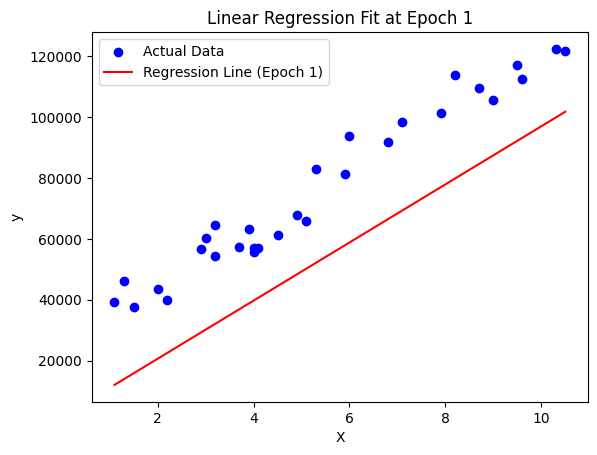

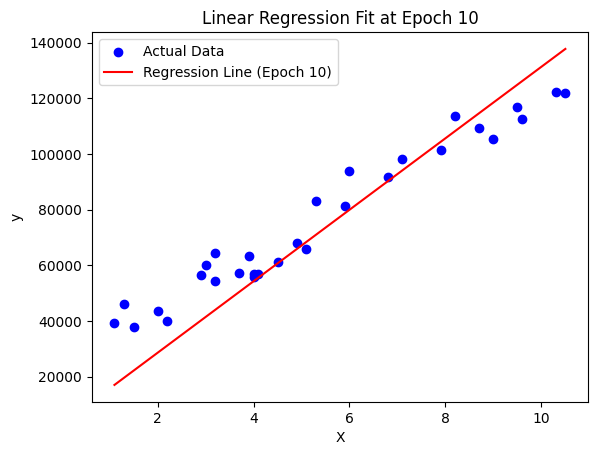

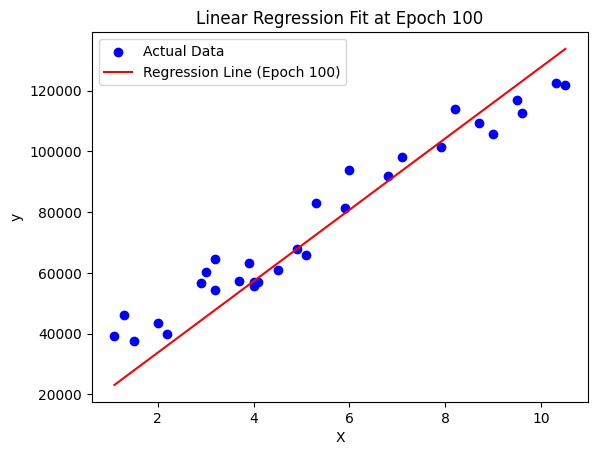

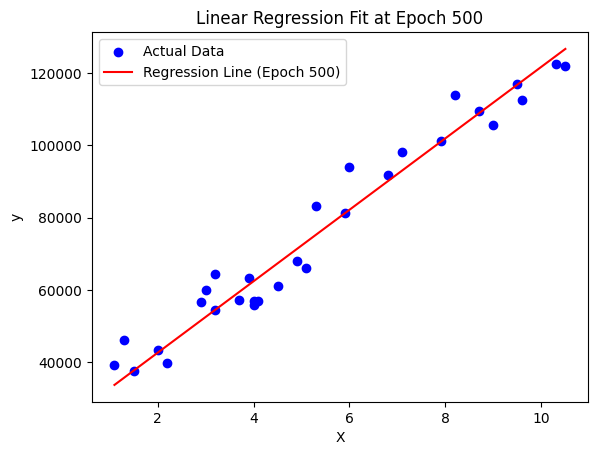

Trained model: y = 9501.01X + 25448.18


In [ ]:
#Load and train the data
data_path = "Salary_Data.csv"
YearsExperience, Salary = load_dataset(data_path)
w, b, loss_history = gradient_descent(YearsExperience, Salary, visualize_epochs=[1, 10, 100, 500, 1000])
print(f"Trained model: y = {w[0][0]:.2f}X + {b[0]:.2f}")

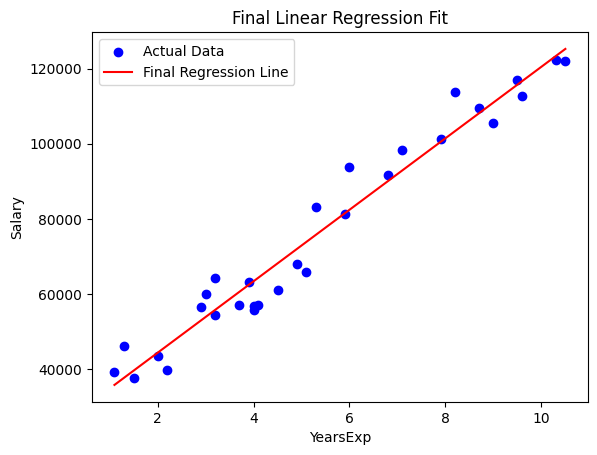

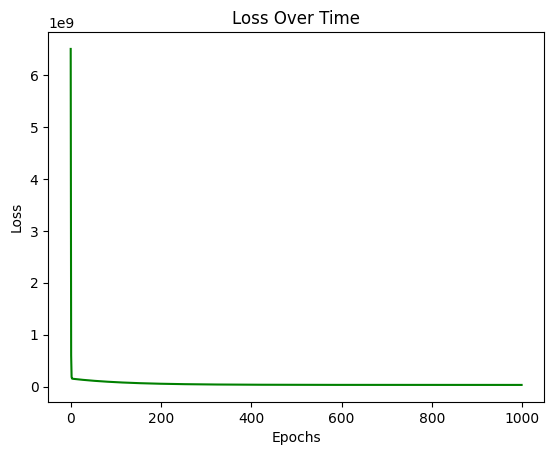

In [ ]:
# Final Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predict(X, w, b), color='red', label='Final Regression Line')
plt.xlabel("YearsExp")
plt.ylabel("Salary")
plt.legend()
plt.title("Final Linear Regression Fit")
plt.show()

# Loss Curve
plt.plot(loss_history, color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.show()
